In [9]:

import pandas as pd

train_df = pd.read_csv('/home/hy/Documents/tianchi/train_set.csv', sep='\t')
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In [13]:
### 作业一：
import re
train_df['sents_len'] = train_df['text'].apply(lambda x: len(re.split(r' 3750 | 900 | 648 ', x)))
train_df['sents_len'].describe()

count    200000.000000
mean         78.094350
std          84.052108
min           1.000000
25%          27.000000
50%          55.000000
75%         100.000000
max        3351.000000
Name: sents_len, dtype: float64

In [ ]:
### 作业二：
with open('/home/hy/Documents/tianchi/train_set.csv') as train_file:
    label_word_set = {}
    result = {}
    train_file.readline()
    for line in train_file:
        label_sentence = line.split("\t")
        if len(label_sentence)!=2:
            continue
        label = label_sentence[0]
        if label not in label_word_set:
            label_word_set[label] = {}
        sentence = label_sentence[1]
        words = sentence.split(" ")
        for word in words:
            if word in label_word_set[label]:
                label_word_set[label][word] += 1
            else:
                label_word_set[label][word] = 1
    for label in label_word_set:
        result[label] = list(sorted(label_word_set[label].items(), key=lambda d:d[1], reverse = True))
    for label in label_word_set:
        print(label)
        print(len(result[label]))
        print(result[label][0])
        print(result[label][len(result[label])-1])
        print("============================================")

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Histogram of char count')

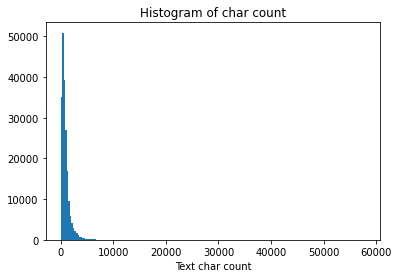

In [9]:
%pylab inline
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

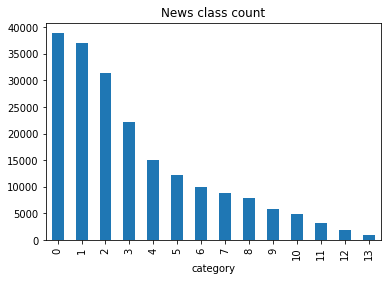

In [10]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

In [4]:
###  all_lines = train_df['text'].apply(lambda x: set(x.split(" ")))
###  这种方式直接oom了 改用读文件的方式
with open('/home/hy/Documents/tianchi/train_set.csv') as train_file:
    word_set = {}
    for line in train_file:
        words = line.split(" ")
        for word in words:
            if word in word_set:
                word_set[word] += 1
            else:
                word_set[word] = 1
    print(len(word_set))
    sorted_word_list = list(sorted(word_set.items(), key=lambda d:d[1], reverse = True))
    print(sorted_word_list[0])
    print(sorted_word_list[len(sorted_word_list)-1])
    

20572
('3750', 7482207)
('0\t6689', 1)
